In [ ]:
import pandas as pd


In [ ]:
import numpy as np

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
# Example dataset (replace with actual data)
data = {
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [25, 34, 30, 40, 23, 50, 60, 20, 70, 35],
    'AnnualIncome': [50000, 60000, 45000, 80000, 35000, 100000, 120000, 30000, 90000, 55000],
    'SpendingScore': [30, 60, 50, 70, 40, 80, 90, 20, 95, 55]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the dataset
print(df)


   CustomerID  Age  AnnualIncome  SpendingScore
0           1   25         50000             30
1           2   34         60000             60
2           3   30         45000             50
3           4   40         80000             70
4           5   23         35000             40
5           6   50        100000             80
6           7   60        120000             90
7           8   20         30000             20
8           9   70         90000             95
9          10   35         55000             55


In [ ]:
# Drop CustomerID column as it's not used for clustering
df = df.drop(columns=['CustomerID'])

# Standardize the features (Age, AnnualIncome, SpendingScore)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Check the scaled data
print(df_scaled)


[[-0.87381761 -0.5851027  -1.22112029]
 [-0.29977684 -0.230495    0.0421076 ]
 [-0.55490607 -0.76240655 -0.37896836]
 [ 0.082917    0.47872039  0.46318356]
 [-1.00138223 -1.11701425 -0.80004433]
 [ 0.72074007  1.18793579  0.88425952]
 [ 1.35856315  1.89715119  1.30533548]
 [-1.19272915 -1.2943181  -1.64219625]
 [ 1.99638622  0.83332809  1.51587346]
 [-0.23599454 -0.40779885 -0.16843038]]


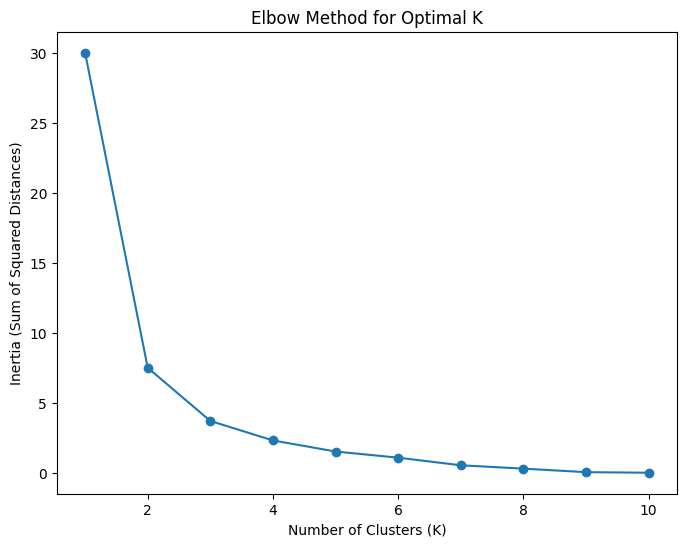

In [ ]:
# Calculate sum of squared distances (inertia) for different K values
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Graph
plt.figure(figsize=(8,6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.show()


In [ ]:
# Fit K-means model with the optimal number of clusters (K=3 for this example)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Display the data with assigned cluster labels
print(df)


   Age  AnnualIncome  SpendingScore  Cluster
0   25         50000             30        1
1   34         60000             60        2
2   30         45000             50        2
3   40         80000             70        2
4   23         35000             40        1
5   50        100000             80        0
6   60        120000             90        0
7   20         30000             20        1
8   70         90000             95        0
9   35         55000             55        2


In [ ]:
pip install seaborn


In [ ]:
import seaborn as sns


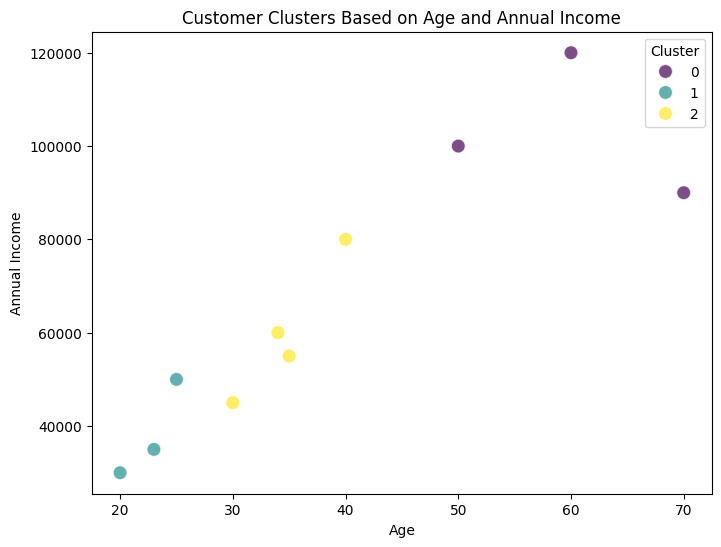

In [ ]:
# Visualize the clusters in a 2D plot (using Age and AnnualIncome)
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Age'], y=df['AnnualIncome'], hue=df['Cluster'], palette='viridis', s=100, alpha=0.7)
plt.title('Customer Clusters Based on Age and Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.legend(title='Cluster')
plt.show()


In [ ]:
# Get the cluster centers (centroids)
centroids = kmeans.cluster_centers_

# Rescale the centroids back to the original scale
centroids_rescaled = scaler.inverse_transform(centroids)

# Display the centroids
centroids_df = pd.DataFrame(centroids_rescaled, columns=['Age', 'AnnualIncome', 'SpendingScore'])
print("Cluster Centroids:")
print(centroids_df)


Cluster Centroids:
         Age   AnnualIncome  SpendingScore
0  60.000000  103333.333333      88.333333
1  22.666667   38333.333333      30.000000
2  34.750000   60000.000000      58.750000
